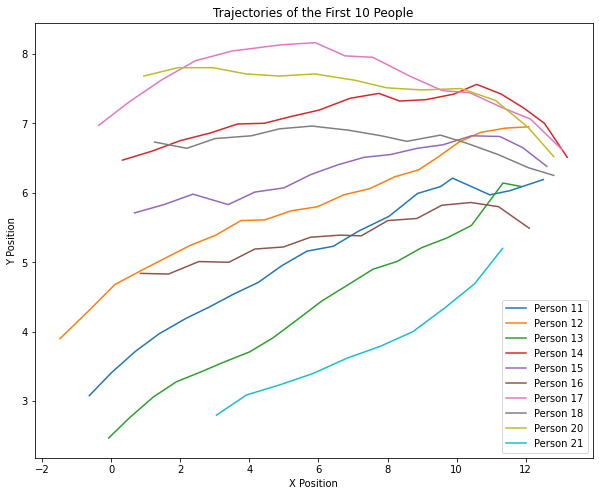

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/raw/eth/test/biwi_eth.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['frame', 'id', 'x', 'y'])

# Filter the first 10 unique people
unique_ids = data['id'].unique()[10:20]
filtered_data = data[data['id'].isin(unique_ids)]

# Plot the trajectories
plt.figure(figsize=(10, 8))
for person_id in unique_ids:
    person_data = filtered_data[filtered_data['id'] == person_id]
    plt.plot(person_data['x'], person_data['y'], label=f'Person {int(person_id)}')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectories of the First 10 People')
plt.legend()
plt.show()

In [1]:
!pip install dill
import sys
sys.path.append("trajectron")

In [2]:
import dill
import pandas as pd

# Load trajectory predictions
file_path = "/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/results/eth_vel_12_trajectory_distribution.pkl"  # Change this if needed

with open(file_path, "rb") as f:
    predictions = dill.load(f)

print(f"Loaded {len(predictions)} scenes successfully!")

# Display summary
print(f"Number of Scenes: {len(predictions)}")
print("Example keys:", list(predictions.keys())[:5])  # Show some keys

# Convert predictions into a structured dataframe
output_list = []
for scene_id, scene_data in predictions.items():
    for timestep, nodes_predictions in scene_data.items():
        for node, samples in nodes_predictions.items():
            for sample_idx in range(samples.shape[0]):  # Iterate over 200 trajectory samples
                future_trajectory = samples[sample_idx]  # Shape: (12, 2) for this sample

                # Print shape for debugging (Optional)
                print(f"Scene: {scene_id}, Node: {node}, Timestep: {timestep}, Sample: {sample_idx}, Shape: {future_trajectory.shape}")

                for t in range(future_trajectory.shape[0]):  # Iterate over 12 timesteps
                    x, y = future_trajectory[t, :2]  # Extract x, y
                    output_list.append([scene_id, timestep, node, sample_idx, t, x, y])

df = pd.DataFrame(output_list, columns=["scene_id", "timestep", "node", "sample_idx", "future_timestep", "x", "y"])
df.to_csv("trajectory_distribution.csv", index=False)

print("Saved trajectory distribution as CSV.")
df.head()

Loaded 37 scenes successfully!
Number of Scenes: 37
Example keys: ['Scene_0_Timestep_0', 'Scene_0_Timestep_10', 'Scene_0_Timestep_30', 'Scene_0_Timestep_210', 'Scene_0_Timestep_220']
Scene: Scene_0_Timestep_0, Node: PEDESTRIAN/2, Timestep: 9, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_10, Node: PEDESTRIAN/2, Timestep: 10, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_10, Node: PEDESTRIAN/2, Timestep: 11, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_10, Node: PEDESTRIAN/2, Timestep: 12, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_10, Node: PEDESTRIAN/3, Timestep: 12, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_30, Node: PEDESTRIAN/12, Timestep: 34, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_30, Node: PEDESTRIAN/11, Timestep: 34, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_210, Node: PEDESTRIAN/56, Timestep: 215, Sample: 0, Shape: (200, 12, 2)
Scene: Scene_0_Timestep_210, Node: PEDESTRIAN/52, Timestep: 215, Sampl

,scene_id,timestep,node,sample_idx,future_timestep,x,y
0,Scene_0_Timestep_0,9,PEDESTRIAN/2,0,0,"[1.2728624, 1.2663946]","[0.5425353, 1.4345086]"
1,Scene_0_Timestep_0,9,PEDESTRIAN/2,0,1,"[1.1048933, 1.4146832]","[0.47980118, 1.581187]"
2,Scene_0_Timestep_0,9,PEDESTRIAN/2,0,2,"[1.1482105, 1.4133545]","[0.3984902, 1.5256763]"
3,Scene_0_Timestep_0,9,PEDESTRIAN/2,0,3,"[1.1361766, 1.420208]","[0.4322896, 1.6144338]"
4,Scene_0_Timestep_0,9,PEDESTRIAN/2,0,4,"[1.1744518, 1.4066561]","[0.45814013, 1.5115846]"


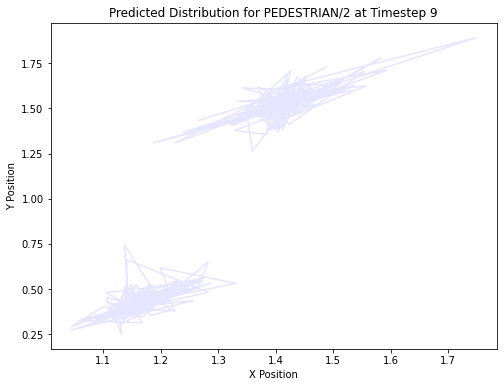

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Load trajectory predictions
file_path = "/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/results/eth_vel_12_trajectory_distribution.pkl"  # Change this if needed

with open(file_path, "rb") as f:
    predictions = dill.load(f)

# Select a scene and timestep for visualization
scene_id = list(predictions.keys())[0]  # Pick first scene
timestep_to_visualize = list(predictions[scene_id].keys())[0]  # First available timestep
node_to_visualize = list(predictions[scene_id][timestep_to_visualize].keys())[0]  # Pick first agent

# Extract trajectories
trajectories = predictions[scene_id][timestep_to_visualize][node_to_visualize]  # Shape: (num_samples, pred_horizon, 2)

# Plot multiple sampled trajectories
plt.figure(figsize=(8, 6))
for i in range(min(50, trajectories.shape[0])):  # Plot first 50 trajectories
    plt.plot(trajectories[i, :, 0], trajectories[i, :, 1], alpha=0.1, color="blue")

plt.title(f"Predicted Distribution for {node_to_visualize} at Timestep {timestep_to_visualize}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

# Load predictions
file_path = "/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/results/eth_vel_12_trajectory_distribution.pkl"

with open(file_path, "rb") as f:
    predictions = pickle.load(f)

# Find a scene and timestep with at least two pedestrians
scene_id, timestep_to_visualize, nodes = None, None, None
for sid, scene_data in predictions.items():
    for ts, nodes_data in scene_data.items():
        if len(nodes_data.keys()) >= 2:
            scene_id = sid
            timestep_to_visualize = ts
            nodes = list(nodes_data.keys())[:2]
            break
    if scene_id is not None:
        break

if scene_id is None or timestep_to_visualize is None or len(nodes) < 2:
    print("Could not find a scene and timestep with at least two pedestrians.")
else:
    ped_1, ped_2 = nodes[0], nodes[1]

    # Extract all predicted points for both pedestrians
    trajectories_1 = predictions[scene_id][timestep_to_visualize][ped_1]  # Shape: (200, 12, 2)
    trajectories_2 = predictions[scene_id][timestep_to_visualize][ped_2]  # Shape: (200, 12, 2)

    # Flatten all predicted points into two lists (X, Y)
    x_1, y_1 = trajectories_1[:, :, 0].flatten(), trajectories_1[:, :, 1].flatten()
    x_2, y_2 = trajectories_2[:, :, 0].flatten(), trajectories_2[:, :, 1].flatten()

    # Plot density heatmap
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=x_1, y=y_1, shade=True, thresh=0.05, alpha=0.8, label=f"Predictions: {ped_1}", cmap="Blues")
    sns.kdeplot(x=x_2, y=y_2, shade=True, thresh=0.05, alpha=0.8, label=f"Predictions: {ped_2}", cmap="Reds")

    # Labels and title
    plt.title(f"Density of Predicted Trajectories for {ped_1} & {ped_2} at {timestep_to_visualize}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.show()

TypeError: kdeplot() missing 1 required positional argument: 'data'

<Figure size 576x432 with 0 Axes>

In [23]:
import torch

# Load the .pt file
model = torch.load('/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3/model_registrar-32.pt')

# Print the model architecture
print("Model Architecture:")
print(model)

# If the model is a state dictionary, you can inspect its keys and parameters
if isinstance(model, dict):
    print("\nModel State Dictionary Keys:")
    for key in model.keys():
        print(key)
    
    print("\nModel Parameters:")
    for key, value in model.items():
        print(f"{key}: {value.shape if hasattr(value, 'shape') else type(value)}")
else:
    # If the model is not a state dictionary, print its named parameters
    print("\nModel Named Parameters:")
    for name, param in model.named_parameters():
        print(f"{name}: {param.shape}")

Model Architecture:
ModuleDict(
  (PEDESTRIAN/node_history_encoder): LSTM(6, 32, batch_first=True)
  (PEDESTRIAN/node_future_encoder): LSTM(2, 32, batch_first=True, bidirectional=True)
  (PEDESTRIAN/node_future_encoder/initial_h): Linear(in_features=6, out_features=32, bias=True)
  (PEDESTRIAN/node_future_encoder/initial_c): Linear(in_features=6, out_features=32, bias=True)
  (PEDESTRIAN/edge_influence_encoder): AdditiveAttention(
    (w1): Linear(in_features=32, out_features=32, bias=False)
    (w2): Linear(in_features=32, out_features=32, bias=False)
    (v): Linear(in_features=32, out_features=1, bias=False)
  )
  (PEDESTRIAN/p_z_x): Linear(in_features=64, out_features=32, bias=True)
  (PEDESTRIAN/hx_to_z): Linear(in_features=32, out_features=25, bias=True)
  (PEDESTRIAN/hxy_to_z): Linear(in_features=192, out_features=25, bias=True)
  (PEDESTRIAN/decoder/state_action): Sequential(
    (0): Linear(in_features=6, out_features=2, bias=True)
  )
  (PEDESTRIAN/decoder/rnn_cell): GRUCell(

In [24]:
!pip install torchviz

     |████████████████████████████████| 46 kB 766 kB/s eta 0:00:011


In [25]:
import torch
from torchviz import make_dot

# Load the .pt file
model = torch.load('/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/pedestrians/models/models_06_Mar_2025_15_57_30_eth_vel_ar3/model_registrar-32.pt')

# Assuming the model is an instance of a PyTorch nn.Module
if not isinstance(model, dict):
    # Create a dummy input tensor with the appropriate shape
    dummy_input = torch.randn(1, 6)  # Adjust the shape based on your model's input requirements

    # Generate the visualization
    dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))

    # Save the visualization to a file
    dot.format = 'png'
    dot.render('/home/sina/env_prediction_project/Trajectron-plus-plus/model_visualization')
else:
    print("The loaded model is a state dictionary, not an instance of nn.Module.")

TypeError: forward() takes 1 positional argument but 2 were given

In [26]:
import pandas as pd

# Load the .pkl file
pkl_file_path = '/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.pkl'
data = pd.read_pickle(pkl_file_path)

# Save the data to a .csv file
csv_file_path = '/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.csv'
data.to_csv(csv_file_path, index=False)

print(f"Converted {pkl_file_path} to {csv_file_path}")

AttributeError: 'Environment' object has no attribute 'to_csv'

In [29]:
with open('/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.pkl', 'wb') as f:
    dill.dump(data, f)

In [30]:
data

In [31]:
import dill
import pandas as pd

# Load the .pkl file using dill
pkl_file_path = '/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.pkl'
with open(pkl_file_path, 'rb') as f:
    data = dill.load(f)

# Assuming the data is a DataFrame, save it to a .csv file
csv_file_path = '/home/sina/env_prediction_project/Trajectron-plus-plus/experiments/processed/eth_test.csv'
if isinstance(data, pd.DataFrame):
    data.to_csv(csv_file_path, index=False)
    print(f"Converted {pkl_file_path} to {csv_file_path}")
else:
    print("The loaded data is not a pandas DataFrame.")

The loaded data is not a pandas DataFrame.
